### Run writeInt-K.py N number of times for gclass=3 and plot results

In [1]:
import subprocess
import shutil
import os
from astropy.io import ascii
import matplotlib.pyplot as plt

# Configuration
n_runs = 10
output_dir = '../data/'
base_output = 'int_K_nq4_nbs500_700controlclass3.npz'  # Expected output filename from writeInt-K.py

# Run writeInt-K.py multiple times and archive results
for i in range(n_runs):
    print(f'Run {i+1}/{n_runs}')
    # Execute the script
    subprocess.run(['python', 'writeInt-K.py'], check=True)
    
    # Archive the output file
    src = os.path.join(output_dir, base_output)
    dst = os.path.join(output_dir, f'run_{i}.npz')
    if os.path.exists(src):
        shutil.copy(src, dst)

Run 1/10
Reading files
Sample file: ../data/VLS_ang5_cz_700control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700controlclass3.png
Save results to: ../data/int_K_nq4_nbs500_700controlclass3.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700controlclass3.npz
Run 2/10
Reading files
Sample file: ../data/VLS_ang5_cz_700control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700controlclass3.png
Save results to: ../data/int_K_nq4_nbs500_700controlclass3.npz
Calculating crosscorrelations
1/4
2/4
3/4
4/4
Plotting correlations
Integration
Writing results in: ../data/int_K_nq4_nbs500_700controlclass3.npz
Run 3/10
Reading files
Sample file: ../data/VLS_ang5_cz_700control.txt
Save correlation plots to: ../plots/cross_treecorr_nq4_nmult15_nbs500_700controlclass3.png
Save results to: ../data/int_K_nq4_nbs500_700controlclass3.npz
Calculating crosscorrelations
1/4

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


R-squared: 0.291
rho=0.540; p=0.46
R-squared: 0.717
rho=0.847; p=0.15


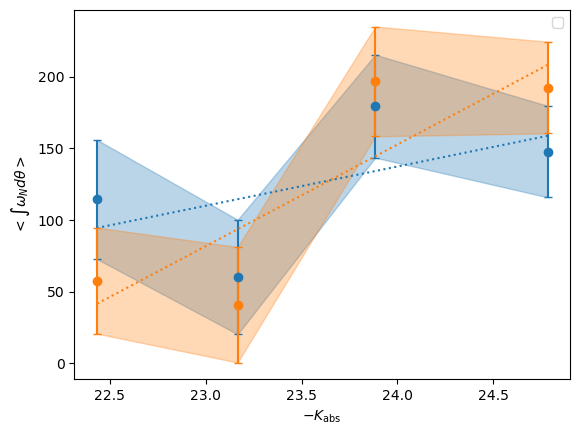

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii

nquant = int(4)
nbootstrap = int(500)
sample = '700controlclass3'
fig, ax = plt.subplots()

N = 10  # Replace with your desired maximum value for XX
colors = [f'C{i:02d}' for i in range(N + 1)]


for i,color in zip([0,9],colors):

    filename = f'../data/run_{i}.npz'

    data = ascii.read(filename)

    from scipy import stats

    meanMag = data['meanMag']
    int_mean = data['int_mean']
    int_std = data['int_std']

    res = stats.linregress(-meanMag, int_mean)
    pearsonr, p_value = stats.pearsonr(-meanMag, int_mean)
    #label = f'{sample}; '+r'$R^2=$'+f'{res.rvalue**2:.2f}'
    label = f'{sample}; '+r'$\rho=$'+f'{pearsonr:.2f}; '+r'$p=$'+f'{p_value:.2f}'
    #ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color,\
    #        label=label)

    print(f"R-squared: {res.rvalue**2:.3f}")
    print(f'rho='+f'{pearsonr:.3f}; '+f'p='+f'{p_value:.2f}')

    ax.plot(-meanMag, res.intercept - res.slope*meanMag, ls=':',c=color),\
            #label=label)

    #for i in range(len(int_mean)):
    ax.errorbar(-meanMag,int_mean,yerr=int_std,c=color,fmt='o',capsize=3)
    #ax.scatter(-meanMag,int_mean,c=color,marker='o')
    ax.fill_between(-meanMag,y1=int_mean-int_std,y2=int_mean+int_std,color=color,alpha=.3)

ax.set_ylabel(r'$<\int\omega_Nd\theta>$')
ax.set_xlabel(r'$-K_{\mathrm{abs}}$')

ax.legend(loc=0,ncol=2)

plt.savefig(f'../plots/test_class3Variance.png')

plt.show()

